In [178]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import normalize
%matplotlib inline

# Load and Clean Data

In [92]:
with open('/Users/pg/OneDrive/Duke Assigment/Job Seeking/Collection_DS_takehome_challenges/data/city_search.json', 'r') as f:
    json_data=json.load(f)

In [93]:
session_id = []
unix_timestamp=[]
cities = []
user_id = []
joining_date = []
country = []
for row in json_data:
    session_id.append(row['session_id'][0])
    unix_timestamp.append(row['unix_timestamp'][0])
    cities.append(row['cities'][0])
    user_id.append(row['user'][0][0]['user_id'])
    joining_date.append(row['user'][0][0]['joining_date'])
    country.append(row['user'][0][0]['country'])
frame = {'session_id': session_id, 'unix_timestamp':unix_timestamp, 'cities':cities, 
         'user_id':user_id, 'joining_date':joining_date, 'country':country}
data = pd.DataFrame(frame)   

In [94]:
data.head()

,session_id,unix_timestamp,cities,user_id,joining_date,country
0,X061RFWB06K9V,1442503708,"New York NY, Newark NJ",2024,2015-03-22,UK
1,5AZ2X2A9BHH5U,1441353991,"New York NY, Jersey City NJ, Philadelphia PA",2853,2015-03-28,DE
2,SHTB4IYAX4PX6,1440843490,San Antonio TX,10958,2015-03-06,UK
3,JBRB8MZGTX3M4,1427268063,Edmonton AB,7693,2015-03-12,IT
4,YJCMPURC2FL9C,1430559067,"Phoenix AZ, Houston TX",7506,2015-02-28,UK


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20022 entries, 0 to 20021
Data columns (total 6 columns):
session_id        20022 non-null object
unix_timestamp    20022 non-null int64
cities            20022 non-null object
user_id           20022 non-null int64
joining_date      20022 non-null object
country           20022 non-null object
dtypes: int64(2), object(4)
memory usage: 938.6+ KB


In [96]:
data['unix_timestamp'] = pd.to_datetime(data['unix_timestamp'], unit = 's')
data['joining_date']=pd.to_datetime(data['joining_date'])

In [97]:
#fill the '' cell
data.loc[data.country == '', 'country'] ='Missing'
data['hour'] = data['unix_timestamp'].apply(lambda x: x.hour)

In [98]:
data.head()

,session_id,unix_timestamp,cities,user_id,joining_date,country,hour
0,X061RFWB06K9V,2015-09-17 15:28:28,"New York NY, Newark NJ",2024,2015-03-22,UK,15
1,5AZ2X2A9BHH5U,2015-09-04 08:06:31,"New York NY, Jersey City NJ, Philadelphia PA",2853,2015-03-28,DE,8
2,SHTB4IYAX4PX6,2015-08-29 10:18:10,San Antonio TX,10958,2015-03-06,UK,10
3,JBRB8MZGTX3M4,2015-03-25 07:21:03,Edmonton AB,7693,2015-03-12,IT,7
4,YJCMPURC2FL9C,2015-05-02 09:31:07,"Phoenix AZ, Houston TX",7506,2015-02-28,UK,9


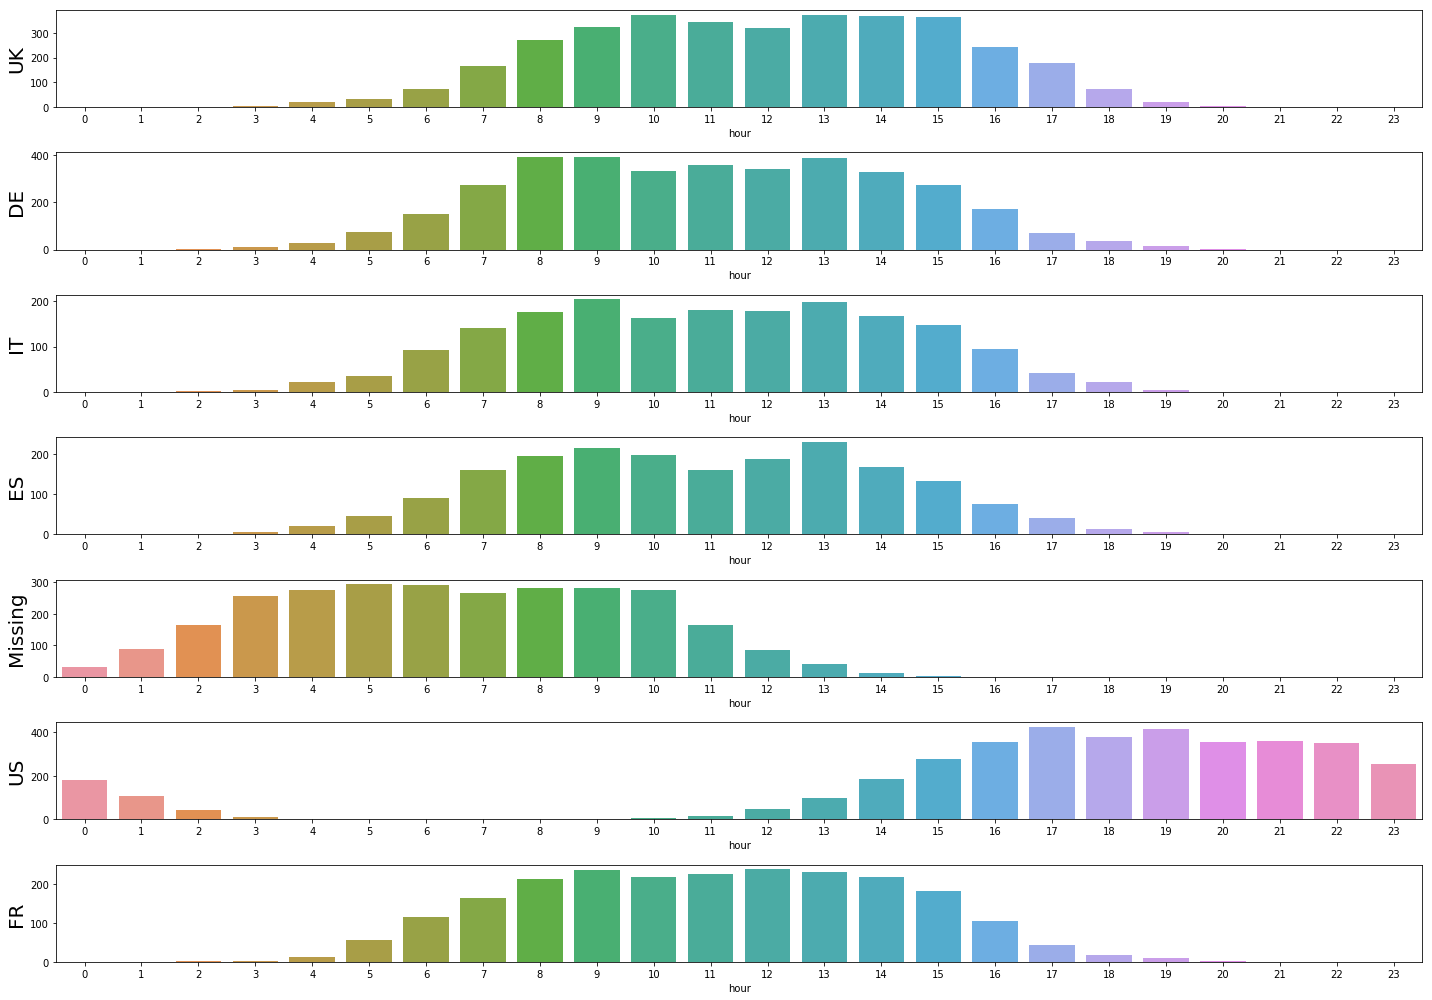

In [99]:
country_list = ['UK', 'DE', 'IT', 'ES', 'Missing', 'US', 'FR']
order = list(range(0,24))
fig, ax = plt.subplots(nrows = 7, ncols=1, figsize=(20,14))
for i in range(0,7):
    sns.countplot(x = 'hour', data = data[data['country']==country_list[i]], ax = ax[i], order = order)
    ax[i].set_ylabel(country_list[i], fontsize = 20)
    
plt.tight_layout()
plt.show()

**According to the time, the Missing country should be the countries in Asia areas such as Japan or China because of the time difference**

# Question 2:

**For each city, find the most likely city to be also searched for within the same session**

In [100]:
data['session_id'].nunique()

20022

In [127]:
city_pair = data['cities'].apply(lambda x: x.split(', '))

In [130]:
index = 0
maps = {}
city_list = []
for item in city_pair:
    for city in item:
        if city not in maps:
            maps[city] = index
            index +=1
            city_list.append(city)

In [131]:
len(city_list)

89

In [137]:
pair_matrix = np.zeros((89,89))

In [154]:
for item in city_pair:
    if len(item) == 1:
        continue
    for i in range(len(item)-1):#anchor the index1
        index1 = maps[item[i]]
        for j in range(i+1, len(item)):#loop to count the cooccurance
            index2 = maps[item[j]]
            pair_matrix[index1, index2] +=1
            pair_matrix[index2, index1] +=1
            
        

In [157]:
df_similarity = pd.DataFrame(pair_matrix, index = city_list, columns=city_list)
df_similarity.head()

,New York NY,Newark NJ,Jersey City NJ,Philadelphia PA,San Antonio TX,Edmonton AB,Phoenix AZ,Houston TX,San Diego CA,Montreal QC,...,Birmingham AL,Nashville TN,Omaha NE,Kansas City MO,Raleigh NC,Greensboro NC,New Orleans LA,Charlotte NC,Lincoln NE,Memphis TN
New York NY,0.0,435.0,549.0,428.0,58.0,39.0,63.0,193.0,60.0,315.0,...,0.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0
Newark NJ,435.0,0.0,249.0,230.0,0.0,0.0,0.0,0.0,0.0,16.0,...,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0
Jersey City NJ,549.0,249.0,0.0,201.0,0.0,0.0,0.0,0.0,0.0,17.0,...,0.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0
Philadelphia PA,428.0,230.0,201.0,0.0,0.0,0.0,0.0,13.0,0.0,33.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
San Antonio TX,58.0,0.0,0.0,0.0,0.0,0.0,0.0,143.0,0.0,21.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


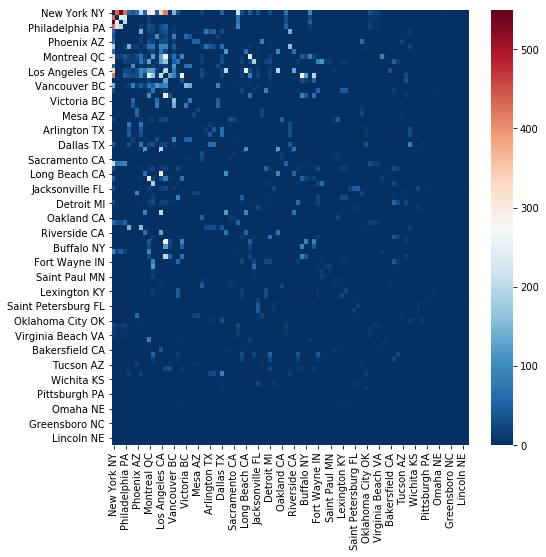

In [160]:
fig, ax = plt.subplots(figsize = (8,8))
sns.heatmap(df_similarity, ax = ax, cmap='RdBu_r')

In [174]:
result = df_similarity.apply(np.argmax, axis = 0).reset_index()
result = result.rename(columns = {'index': 'city', 0: 'most similar'})

In [176]:
result.head()

,city,most similar
0,New York NY,Jersey City NJ
1,Newark NJ,New York NY
2,Jersey City NJ,New York NY
3,Philadelphia PA,New York NY
4,San Antonio TX,Houston TX


# Question 3

**Travel sites are browsed by two kinds of users. Users who are actually planning a trip and users who just dream about a vacation. The first ones have obviously a much higher purchasing intent. Users planning a trip often search for cities close to each other, while users who search for cities far away from each other are often just dreaming about a vacation. That is, a user searching for LA, SF and Las Vegas in the same session is much more likely to book a hotel than a user searching for NY, Paris, Kuala Lumpur (makes sense, right?). Based on this idea, come up with an algorithm that clusters sessions into two groups: high intent and low intent. Explain all assumptions you make along the way.**

***One most direct way is to calculate the distance betweens cities to see the intention. This can be done by using the GoogleMap API to do the calculation.***

***A more pratical way is to use the similarity between cities. One assumption here is that people only dreaming about trips won't do research systematically and so there is a random choice leading to a low similarity between randomly chosen cities.***

In [181]:
df_similarity

,New York NY,Newark NJ,Jersey City NJ,Philadelphia PA,San Antonio TX,Edmonton AB,Phoenix AZ,Houston TX,San Diego CA,Montreal QC,...,Birmingham AL,Nashville TN,Omaha NE,Kansas City MO,Raleigh NC,Greensboro NC,New Orleans LA,Charlotte NC,Lincoln NE,Memphis TN
New York NY,0.0,435.0,549.0,428.0,58.0,39.0,63.0,193.0,60.0,315.0,...,0.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0
Newark NJ,435.0,0.0,249.0,230.0,0.0,0.0,0.0,0.0,0.0,16.0,...,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0
Jersey City NJ,549.0,249.0,0.0,201.0,0.0,0.0,0.0,0.0,0.0,17.0,...,0.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0
Philadelphia PA,428.0,230.0,201.0,0.0,0.0,0.0,0.0,13.0,0.0,33.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
San Antonio TX,58.0,0.0,0.0,0.0,0.0,0.0,0.0,143.0,0.0,21.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
Edmonton AB,39.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Phoenix AZ,63.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Houston TX,193.0,0.0,0.0,13.0,143.0,11.0,18.0,0.0,15.0,64.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
San Diego CA,60.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Montreal QC,315.0,16.0,17.0,33.0,21.0,11.0,29.0,64.0,16.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [197]:
data['cities']
def distance(cities):
    cities = cities.split(', ')
    if len(cities) == 1:
        return 0
    distance = 0
    for i in range(len(cities)-1):
        city1 = cities[i]
        for j in range(i+1, len(cities)):
            city2 = cities[j]
            distance += normalized_similarity.loc[city1, city2]
    return distance/len(cities)

In [196]:
normalized_similarity = pd.DataFrame(normalize(df_similarity, axis = 1), index = df_similarity.index, columns=df_similarity.columns)
normalized_similarity.head()

,New York NY,Newark NJ,Jersey City NJ,Philadelphia PA,San Antonio TX,Edmonton AB,Phoenix AZ,Houston TX,San Diego CA,Montreal QC,...,Birmingham AL,Nashville TN,Omaha NE,Kansas City MO,Raleigh NC,Greensboro NC,New Orleans LA,Charlotte NC,Lincoln NE,Memphis TN
New York NY,0.000000,0.384977,0.485868,0.378782,0.05133,0.034515,0.055755,0.170806,0.0531,0.278777,...,0.0,0.0,0.0,0.000000,0.002655,0.000885,0.0,0.000885,0.000000,0.0
Newark NJ,0.779372,0.000000,0.446123,0.412082,0.00000,0.000000,0.000000,0.000000,0.0000,0.028667,...,0.0,0.0,0.0,0.000000,0.003583,0.001792,0.0,0.001792,0.000000,0.0
Jersey City NJ,0.854016,0.387341,0.000000,0.312672,0.00000,0.000000,0.000000,0.000000,0.0000,0.026445,...,0.0,0.0,0.0,0.000000,0.004667,0.001556,0.0,0.001556,0.000000,0.0
Philadelphia PA,0.789833,0.424443,0.370926,0.000000,0.00000,0.000000,0.000000,0.023990,0.0000,0.060898,...,0.0,0.0,0.0,0.000000,0.001845,0.000000,0.0,0.001845,0.000000,0.0
San Antonio TX,0.241493,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.595405,0.0000,0.087437,...,0.0,0.0,0.0,0.004164,0.000000,0.000000,0.0,0.000000,0.004164,0.0


In [198]:
data['distance'] = data['cities'].apply(distance)

In [201]:
data.head()

,session_id,unix_timestamp,cities,user_id,joining_date,country,hour,distance
0,X061RFWB06K9V,2015-09-17 15:28:28,"New York NY, Newark NJ",2024,2015-03-22,UK,15,0.192489
1,5AZ2X2A9BHH5U,2015-09-04 08:06:31,"New York NY, Jersey City NJ, Philadelphia PA",2853,2015-03-28,DE,8,0.392441
2,SHTB4IYAX4PX6,2015-08-29 10:18:10,San Antonio TX,10958,2015-03-06,UK,10,0.000000
3,JBRB8MZGTX3M4,2015-03-25 07:21:03,Edmonton AB,7693,2015-03-12,IT,7,0.000000
4,YJCMPURC2FL9C,2015-05-02 09:31:07,"Phoenix AZ, Houston TX",7506,2015-02-28,UK,9,0.056064


In [ ]:
#let's just consider the cities >1


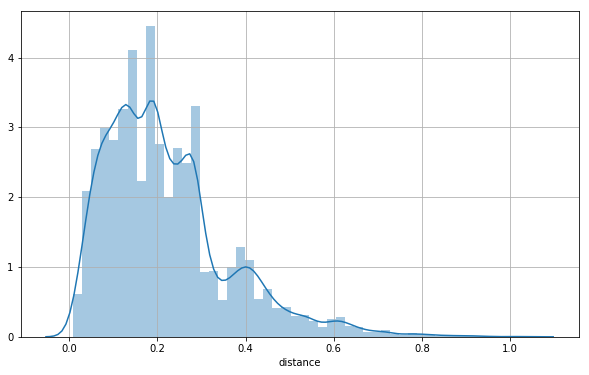

In [207]:
fig, ax = plt.subplots(figsize = (10,6))
sns.distplot(data[data['distance'] != 0]['distance'])
ax.grid(True)

**According to the distrubution we can see it's possible to set the cut off threshold to decide who has strong intent and who do not. For example we can set the threshold at 0.3. Distance <0.3 means high intent and Distance >=0.3 means low intent.**